## Exercise 2
How to do classification using a dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"


In [1]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

7


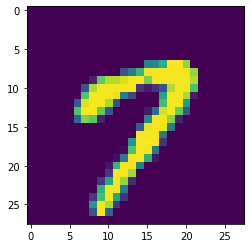

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[15])
print(y_train[15])

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=9, callbacks=[callbacks])

Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2010 - accuracy: 0.9414
Epoch 2/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0827 - accuracy: 0.9745
Epoch 3/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 4/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0383 - accuracy: 0.9878
Epoch 5/9
1862/1875 [============================>.] - ETA: 0s - loss: 0.0278 - accuracy: 0.9909
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0278 - accuracy: 0.9909
